<a href="https://colab.research.google.com/github/motho17/U-SAM-hybrid-model/blob/main/Converting_Nifti_to_jpg_format_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preparation

In [ ]:
import os
import cv2
import shutil
import numpy as np
from tqdm import tqdm
from glob import glob
import nibabel as nib
import matplotlib.pyplot as plt

In [ ]:
base_dir = '../content/drive/MyDrive/SAM/MICCAI_BraTS2020_TrainingData'
modality_types = ['flair', 't1ce', 't1', 'seg']# 't2'

In [ ]:
sorted(os.listdir(base_dir))[0]

'BraTS20_Training_001'

In [ ]:
print ('number of patients:', len (os.listdir (base_dir)) - 2)

number of patients: 370


In [ ]:
imgs_path = os.path.join (base_dir, sorted (os.listdir (base_dir))[0])


In [ ]:
fnames = glob(f'{imgs_path}/*.nii')
fnames

['../content/drive/MyDrive/SAM/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii',
 '../content/drive/MyDrive/SAM/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii',
 '../content/drive/MyDrive/SAM/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii',
 '../content/drive/MyDrive/SAM/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii',
 '../content/drive/MyDrive/SAM/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii']

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)


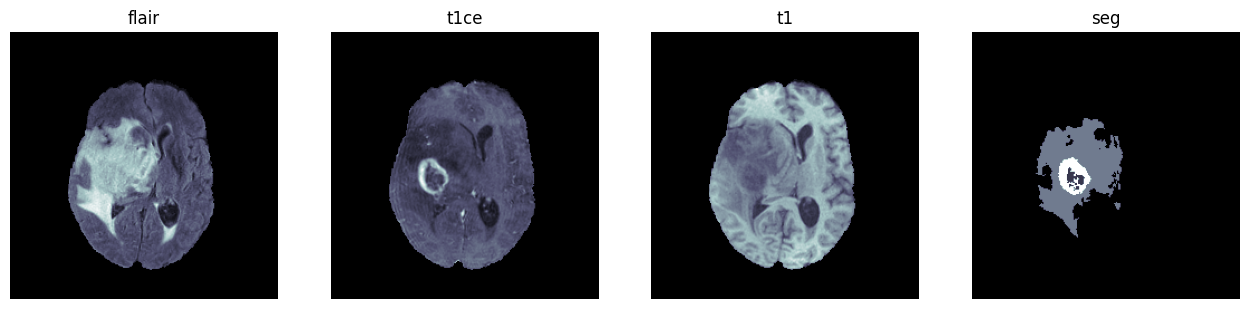

In [ ]:
plt.figure (figsize = (20, 20))
for i, modality_type in enumerate (modality_types):
    plt.subplot (1, 5, i + 1)
    img_path = glob (f'{imgs_path}/*_{modality_type}.nii')[0]
    img = nib.load (img_path)
    print(img.shape)
    img = np.asanyarray (img.dataobj).T
    plt.imshow (img [75], cmap = 'bone')
    plt.title (modality_type)
    plt.axis ('off')

In [ ]:
img = nib.load (fnames [3])
img = np.asanyarray (img.dataobj).T


In [ ]:
# maximum number of segmented image
max_nums = []
for i in tqdm (range (155)):
    max_num = img [i].max ()
    max_nums.append (max_num)

print (max (max_nums))

100%|██████████| 155/155 [00:00<00:00, 335.83it/s]

1845


In [ ]:
folders = (sorted (os.listdir (base_dir)))[:-3]


In [ ]:
os.mkdir ('BraTs2')
i = 0
for folder in tqdm (folders):
    # go to each patient data
    folder_dir = os.path.join (base_dir, folder)
    imgs = []
    for modality_type in modality_types:
        # read each data and save it to list
        img_path = glob (f'{folder_dir}/*_{modality_type}.nii')[0]
        img = nib.load (img_path)
        img = np.asanyarray (img.dataobj).T
        img = ((img - img.min ())/(img.max () - img.min ()) * 255).astype(np.uint8)
        img = img[40:136, :, :]
        imgs.append (img)

    for j in range (imgs [0].shape [0]):

        # just not empty images
        if sum ([imgs [num][j].sum () for num in range (5)]) != 0:
            i += 1
            # create directory
            if not os.path.exists ('BraTs/' + str (i)):
                os.mkdir ('BraTs2/' + str (i))

            for idx, modality_name in enumerate (modality_types):

                cv2.imwrite (modality_name + '.jpg', imgs [idx][j])

                # save 5 type of each slice in separate folder
                src = modality_name + '.jpg'
                dst = os.path.join ('BraTs2/' + str (i), src)
                shutil.move (src, dst)

# New section

In [ ]:
from google.colab import files
files.download("/content/BraTs2")

In [ ]:
# !zip -r /content/BraTs.zip/content/BraTs

!zip -r /content/BraTs2.zip /content/BraTs2

Streaming output truncated to the last 5000 lines.
updating: content/BraTs2/3830/t2.jpg (deflated 11%)
updating: content/BraTs2/3830/seg.jpg (deflated 69%)
updating: content/BraTs2/4529/ (stored 0%)
updating: content/BraTs2/4529/t1ce.jpg (deflated 5%)
updating: content/BraTs2/4529/flair.jpg (deflated 5%)
updating: content/BraTs2/4529/t1.jpg (deflated 4%)
updating: content/BraTs2/4529/t2.jpg (deflated 4%)
updating: content/BraTs2/4529/seg.jpg (deflated 20%)
updating: content/BraTs2/20978/ (stored 0%)
updating: content/BraTs2/20978/t1ce.jpg (deflated 6%)
updating: content/BraTs2/20978/flair.jpg (deflated 5%)
updating: content/BraTs2/20978/t1.jpg (deflated 6%)
updating: content/BraTs2/20978/t2.jpg (deflated 5%)
updating: content/BraTs2/20978/seg.jpg (deflated 58%)
updating: content/BraTs2/27801/ (stored 0%)
updating: content/BraTs2/27801/t1ce.jpg (deflated 17%)
updating: content/BraTs2/27801/flair.jpg (deflated 17%)
updating: content/BraTs2/27801/t1.jpg (deflated 18%)
updating: content/Br

In [ ]:
from google.colab import files
files.download('/content/BraTs2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preprocess

In [ ]:
!unzip '/content/BraTs2.zip' -d '/content/BraTs2020'

Streaming output truncated to the last 5000 lines.
  inflating: /content/BraTs2020/content/BraTs2/3830/t2.jpg  
  inflating: /content/BraTs2020/content/BraTs2/3830/seg.jpg  
   creating: /content/BraTs2020/content/BraTs2/4529/
  inflating: /content/BraTs2020/content/BraTs2/4529/t1ce.jpg  
  inflating: /content/BraTs2020/content/BraTs2/4529/flair.jpg  
  inflating: /content/BraTs2020/content/BraTs2/4529/t1.jpg  
  inflating: /content/BraTs2020/content/BraTs2/4529/t2.jpg  
  inflating: /content/BraTs2020/content/BraTs2/4529/seg.jpg  
   creating: /content/BraTs2020/content/BraTs2/20978/
  inflating: /content/BraTs2020/content/BraTs2/20978/t1ce.jpg  
  inflating: /content/BraTs2020/content/BraTs2/20978/flair.jpg  
  inflating: /content/BraTs2020/content/BraTs2/20978/t1.jpg  
  inflating: /content/BraTs2020/content/BraTs2/20978/t2.jpg  
  inflating: /content/BraTs2020/content/BraTs2/20978/seg.jpg  
   creating: /content/BraTs2020/content/BraTs2/27801/
  inflating: /content/BraTs2020/conten

In [ ]:
from glob import glob
import os
imgs_dir='/content/BraTs2020/content/BraTs2'
all_dirs = glob (f'{imgs_dir}/*')
all_dirs = all_dirs
len (all_dirs)


35380

In [ ]:
len(all_dirs)

In [ ]:
def shuffle_split (all_dirs, val_pct = 0.15, seed = 99):
    """ shuffling dataset with random state and split to train and valid """
    n_val = int (len (all_dirs) * val_pct)
    np.random.seed (seed)
    idx = np.random.permutation (len (all_dirs))
    all_dirs = np.array (all_dirs) [idx]

    return all_dirs [n_val:], all_dirs [:n_val]

train_dirs, valid_dirs = shuffle_split (all_dirs, seed = 1)
len(valid_dirs), len(train_dirs)